In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

cars = np.load("output/car_predict.npy")
pedestrian = np.load("output/ppedestrian.npy")
truck = np.load("output/truck_predict.npy")
cyclist = np.load("output/cyclist_predict.npy")

In [4]:
print(cars.size)
print(pedestrian.size)
print(truck.size)
print(cyclist.size)

2841
3623
1084
1616


In [2]:
small_ped = np.random.choice(pedestrian, 1084)
small_cars = np.random.choice(cars, 1084)
small_cyclist = np.random.choice(cyclist, 1084)

Text(0.5, 0, 'Pedestrian Point Clouds')

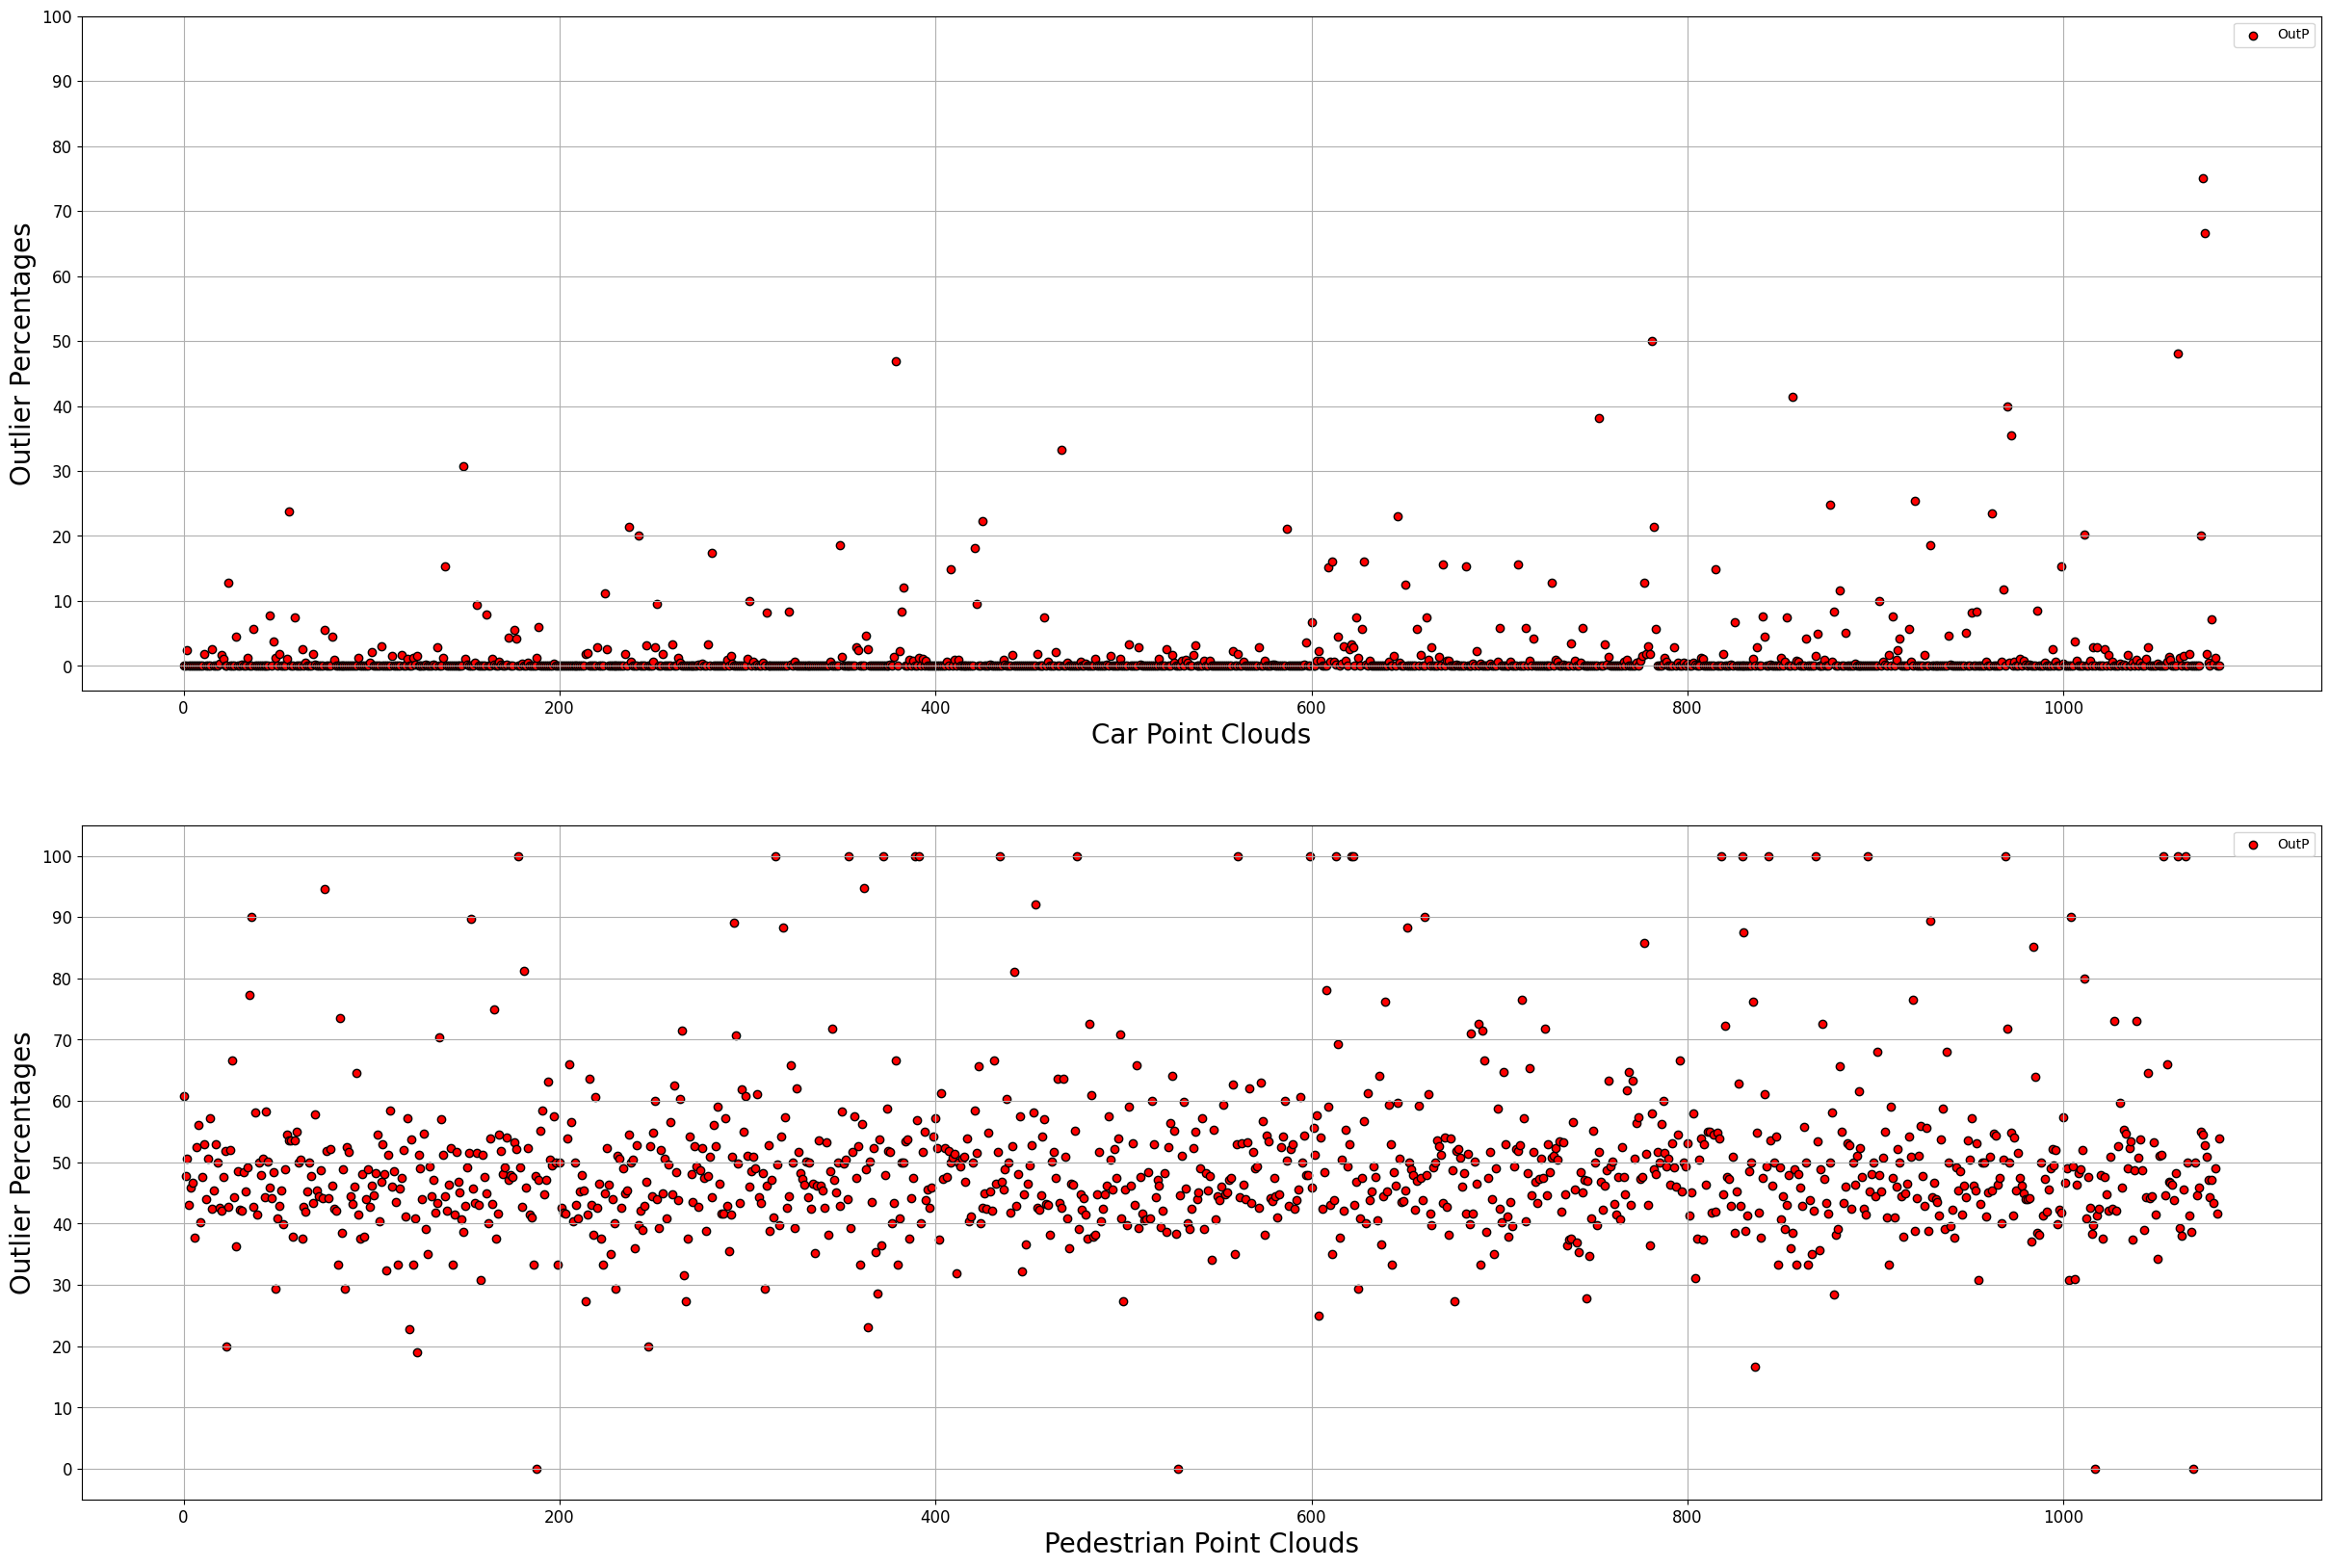

In [11]:
X = np.arange(0, len(small_cars))

plt.rcParams['figure.figsize'] = [30, 20]

fig, ax = plt.subplots(2)
ax[0].scatter(X, small_cars, edgecolor='black',color='red', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Car Point Clouds', fontsize=20)

#########################################################

X = np.arange(0, len(small_ped))
ax[1].scatter(X, small_ped, edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Pedestrian Point Clouds', fontsize=20)

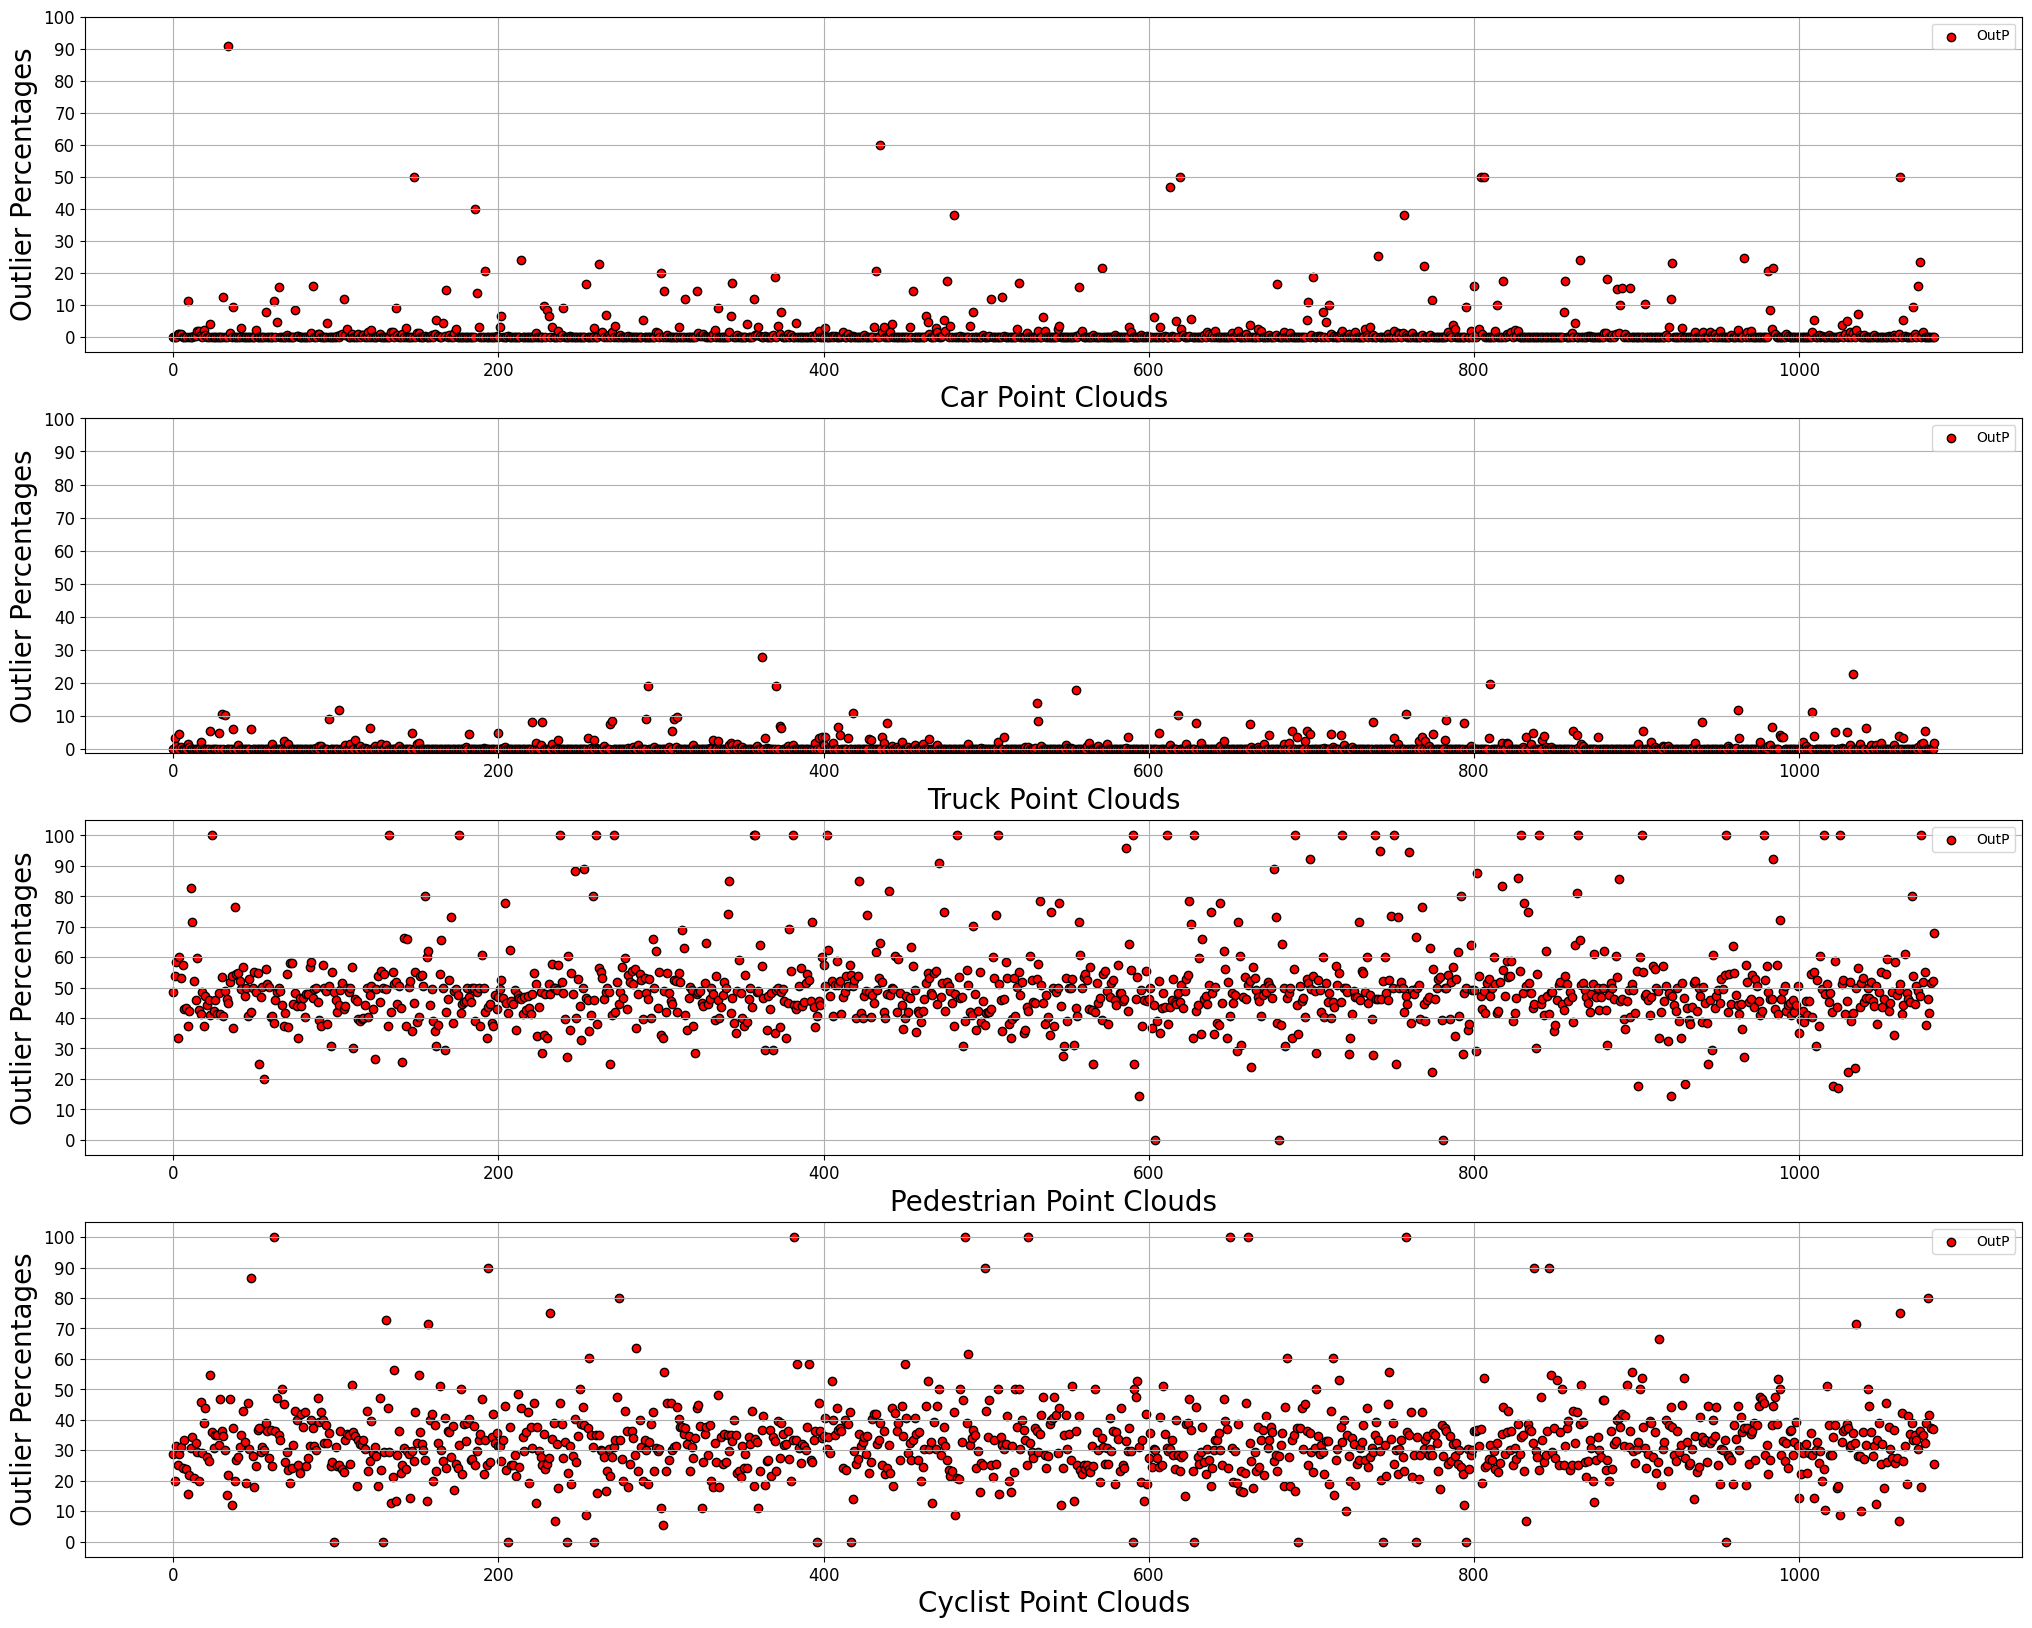

In [15]:
X = np.arange(0, len(small_cars))

plt.rcParams['figure.figsize'] = [25, 20]

fig, ax = plt.subplots(4)
ax[0].scatter(X, small_cars, edgecolor='black',color='red', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Car Point Clouds', fontsize=20)

########################

X = np.arange(0, len(truck))
ax[1].scatter(X, truck, edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Truck Point Clouds', fontsize=20)

########################

X = np.arange(0, len(small_ped))
ax[2].scatter(X, small_ped, edgecolor='black',color='red', label='OutP')
ax[2].set_yticks(np.arange(0, 110, step=10))
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].legend()
ax[2].grid()
ax[2].set_ylabel('Outlier Percentages', fontsize=20)
ax[2].set_xlabel('Pedestrian Point Clouds', fontsize=20)

########################

X = np.arange(0, len(small_cyclist))
ax[3].scatter(X, small_cyclist, edgecolor='black',color='red', label='OutP')
ax[3].set_yticks(np.arange(0, 110, step=10))
ax[3].tick_params(axis='x', labelsize=12)
ax[3].tick_params(axis='y', labelsize=12)
ax[3].legend()
ax[3].grid()
ax[3].set_ylabel('Outlier Percentages', fontsize=20)
ax[3].set_xlabel('Cyclist Point Clouds', fontsize=20)

plt.show()

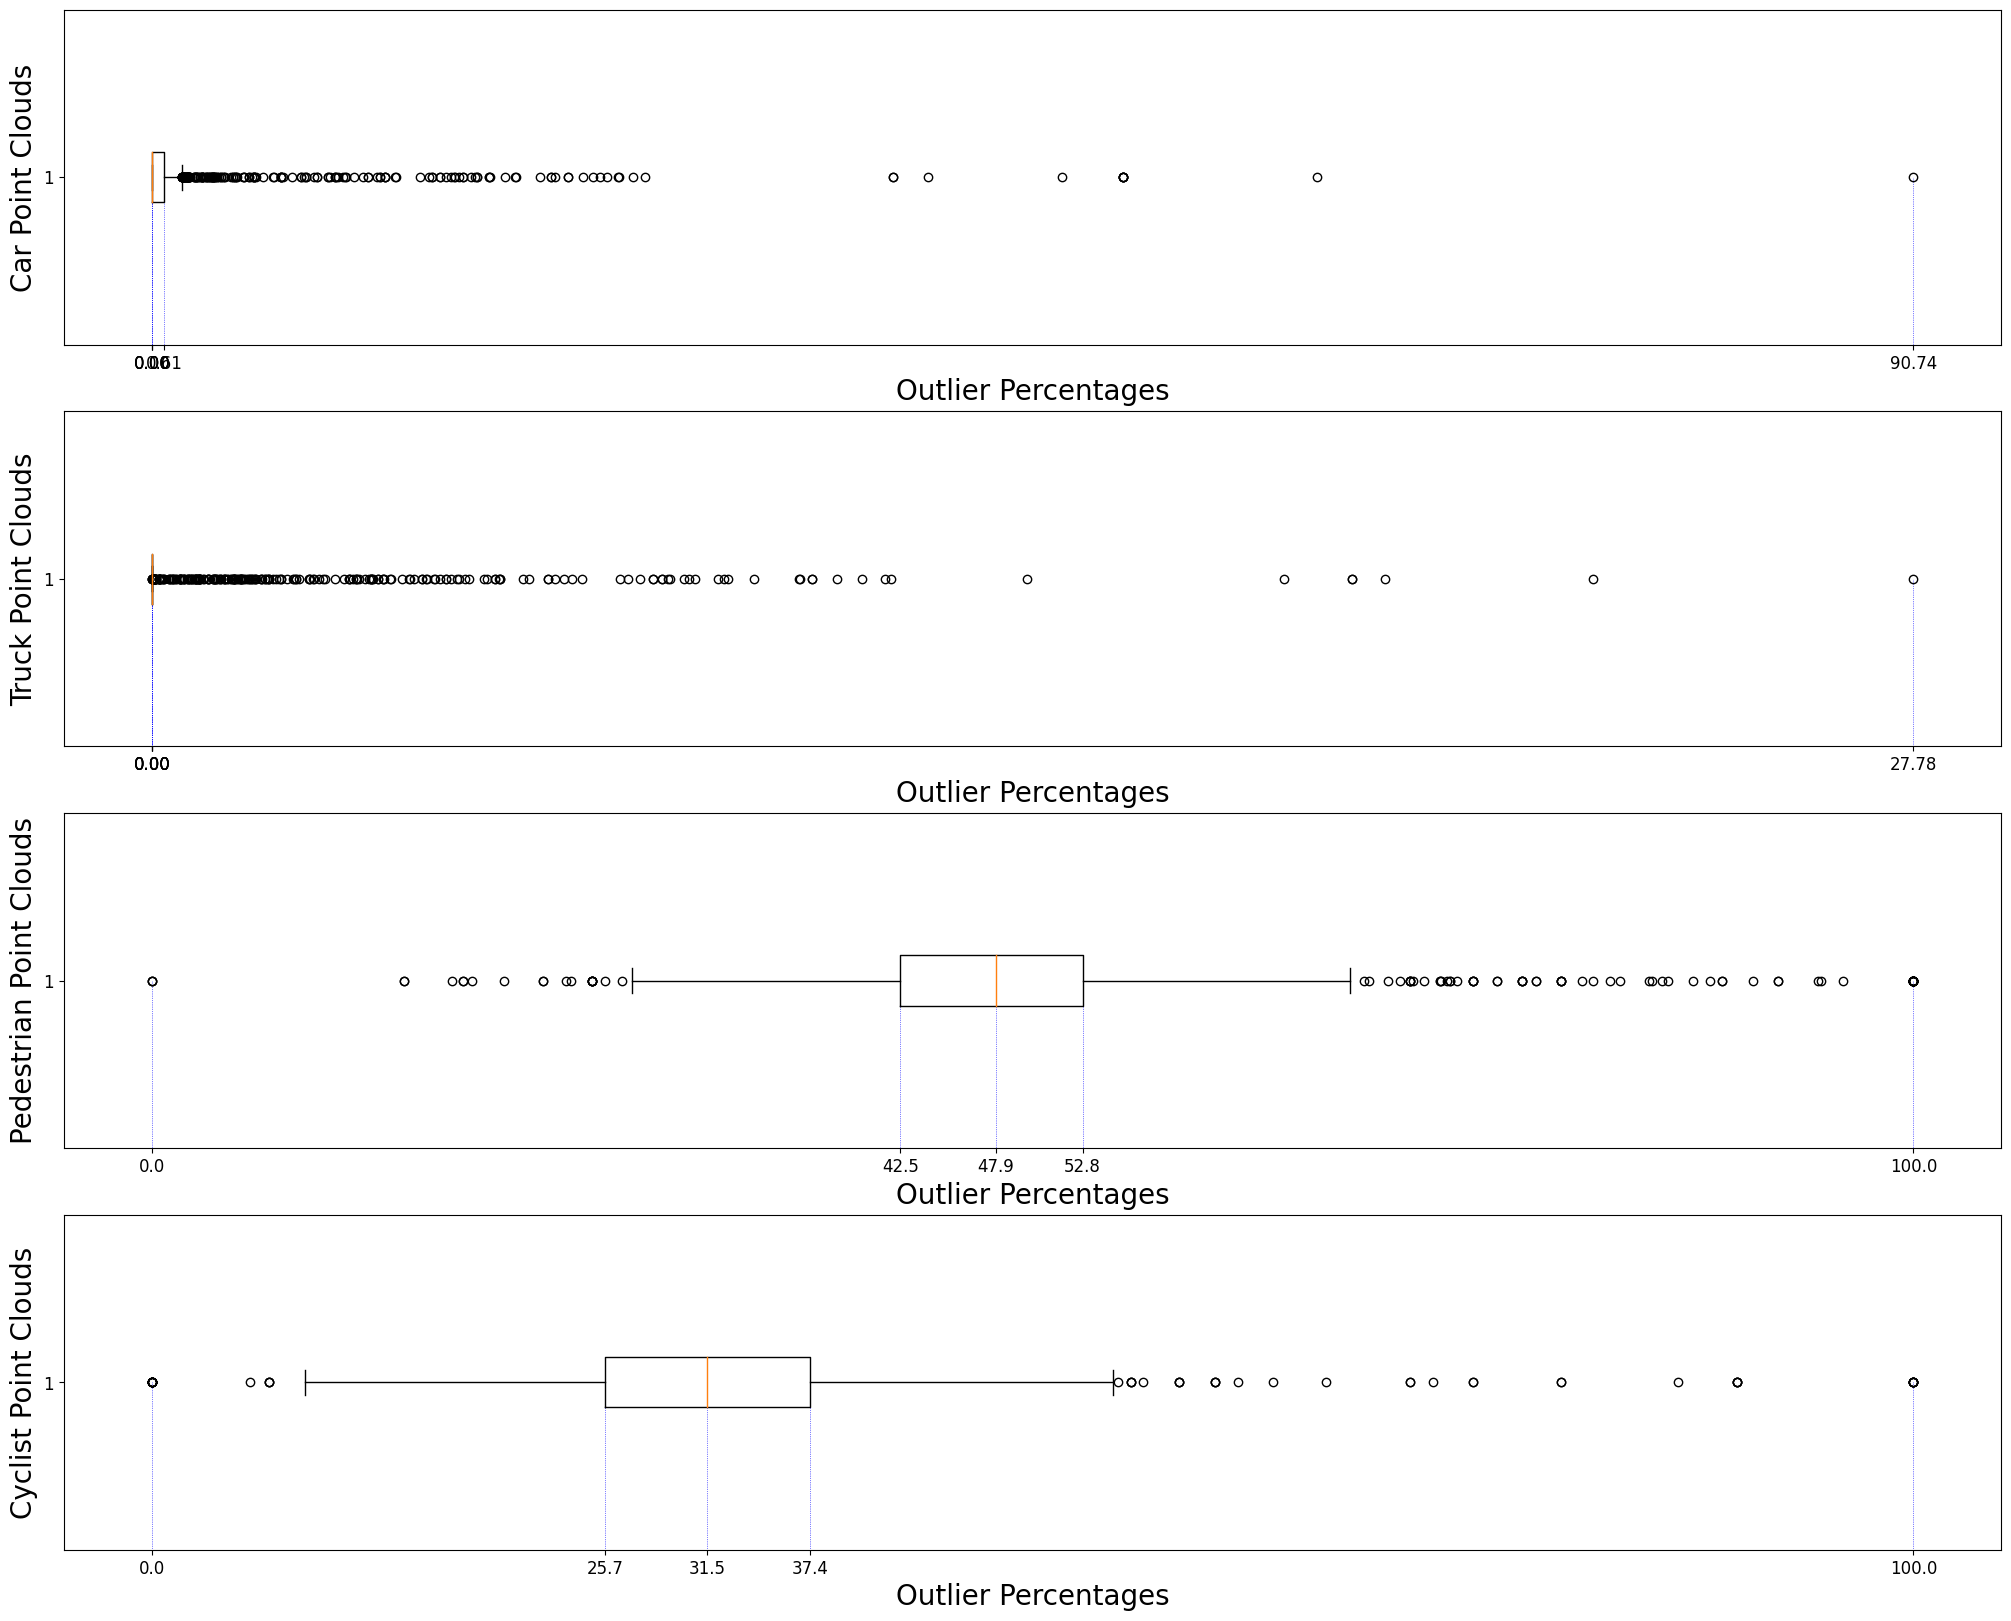

In [17]:
fig, ax = plt.subplots(4, figsize=(25, 20))
##cars
ax[0].boxplot(small_cars, vert=False, manage_ticks=True)
ax[0].set_xlabel('Outlier Percentages', fontsize=20)
ax[0].set_yticks([1])
ax[0].set_ylabel('Car Point Clouds', fontsize=20)

quantiles = np.percentile(small_cars, [0, 25, 50, 75, 100])
ax[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[0].set_ylim(0.5, 1.5)
ax[0].set_xticks(quantiles)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

####################

##Trucks
ax[1].boxplot(truck, vert=False, manage_ticks=True)
ax[1].set_xlabel('Outlier Percentages', fontsize=20)
ax[1].set_yticks([1])
ax[1].set_ylabel('Truck Point Clouds', fontsize=20)

quantiles = np.percentile(truck, [0, 25, 50, 75, 100])
ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[1].set_ylim(0.5, 1.5)
ax[1].set_xticks(quantiles)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

####################

##Peds
ax[2].boxplot(small_ped, vert=False, manage_ticks=True)
ax[2].set_xlabel('Outlier Percentages', fontsize=20)
ax[2].set_yticks([1])
ax[2].set_ylabel('Pedestrian Point Clouds', fontsize=20)

quantiles = np.percentile(small_ped, [0, 25, 50, 75, 100])
ax[2].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[2].set_ylim(0.5, 1.5)
ax[2].set_xticks(quantiles)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)

####################

##cyclist
ax[3].boxplot(small_cyclist, vert=False, manage_ticks=True)
ax[3].set_xlabel('Outlier Percentages', fontsize=20)
ax[3].set_yticks([1])
ax[3].set_ylabel('Cyclist Point Clouds', fontsize=20)

quantiles = np.percentile(small_cyclist, [0, 25, 50, 75, 100])
ax[3].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[3].set_ylim(0.5, 1.5)
ax[3].set_xticks(quantiles)
ax[3].tick_params(axis='x', labelsize=12)
ax[3].tick_params(axis='y', labelsize=12)

plt.show()

In [18]:
print("Cars:")
print("Sample Size:" + str(len(small_cars)))
print("Quartiles:" + str(np.percentile(small_cars, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(small_cars)))
print("Variance:" + str(np.var(small_cars)))

print("\n")

print("Trucks:")
print("Sample Size:" + str(len(truck)))
print("Quartiles:" + str(np.percentile(truck, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(truck)))
print("Variance:" + str(np.var(truck)))

print("\n")


print("Pedestrians:")
print("Sample Size:" + str(len(small_ped)))
print("Quartiles:" + str(np.percentile(small_ped, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(small_ped)))
print("Variance:" + str(np.var(small_ped)))

print("\n")

print("Cyclists:")
print("Sample Size:" + str(len(small_cyclist)))
print("Quartiles:" + str(np.percentile(small_cyclist, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(small_cyclist)))
print("Variance:" + str(np.var(small_cyclist)))

Cars:
Sample Size:1084
Quartiles:[ 0.          0.          0.          0.61069131 90.74074074]
Standard Deviation:6.437050209345525
Variance:41.43561539763527


Trucks:
Sample Size:1084
Quartiles:[ 0.          0.          0.          0.         27.77777778]
Standard Deviation:2.3110651026239832
Variance:5.341021908566402


Pedestrians:
Sample Size:1084
Quartiles:[  0.          42.48753561  47.9220639   52.83692722 100.        ]
Standard Deviation:13.51268586902559
Variance:182.59267939496385


Cyclists:
Sample Size:1084
Quartiles:[  0.          25.73710074  31.53427479  37.35415346 100.        ]
Standard Deviation:12.221712565515128
Variance:149.3702580340704


### Big Sample

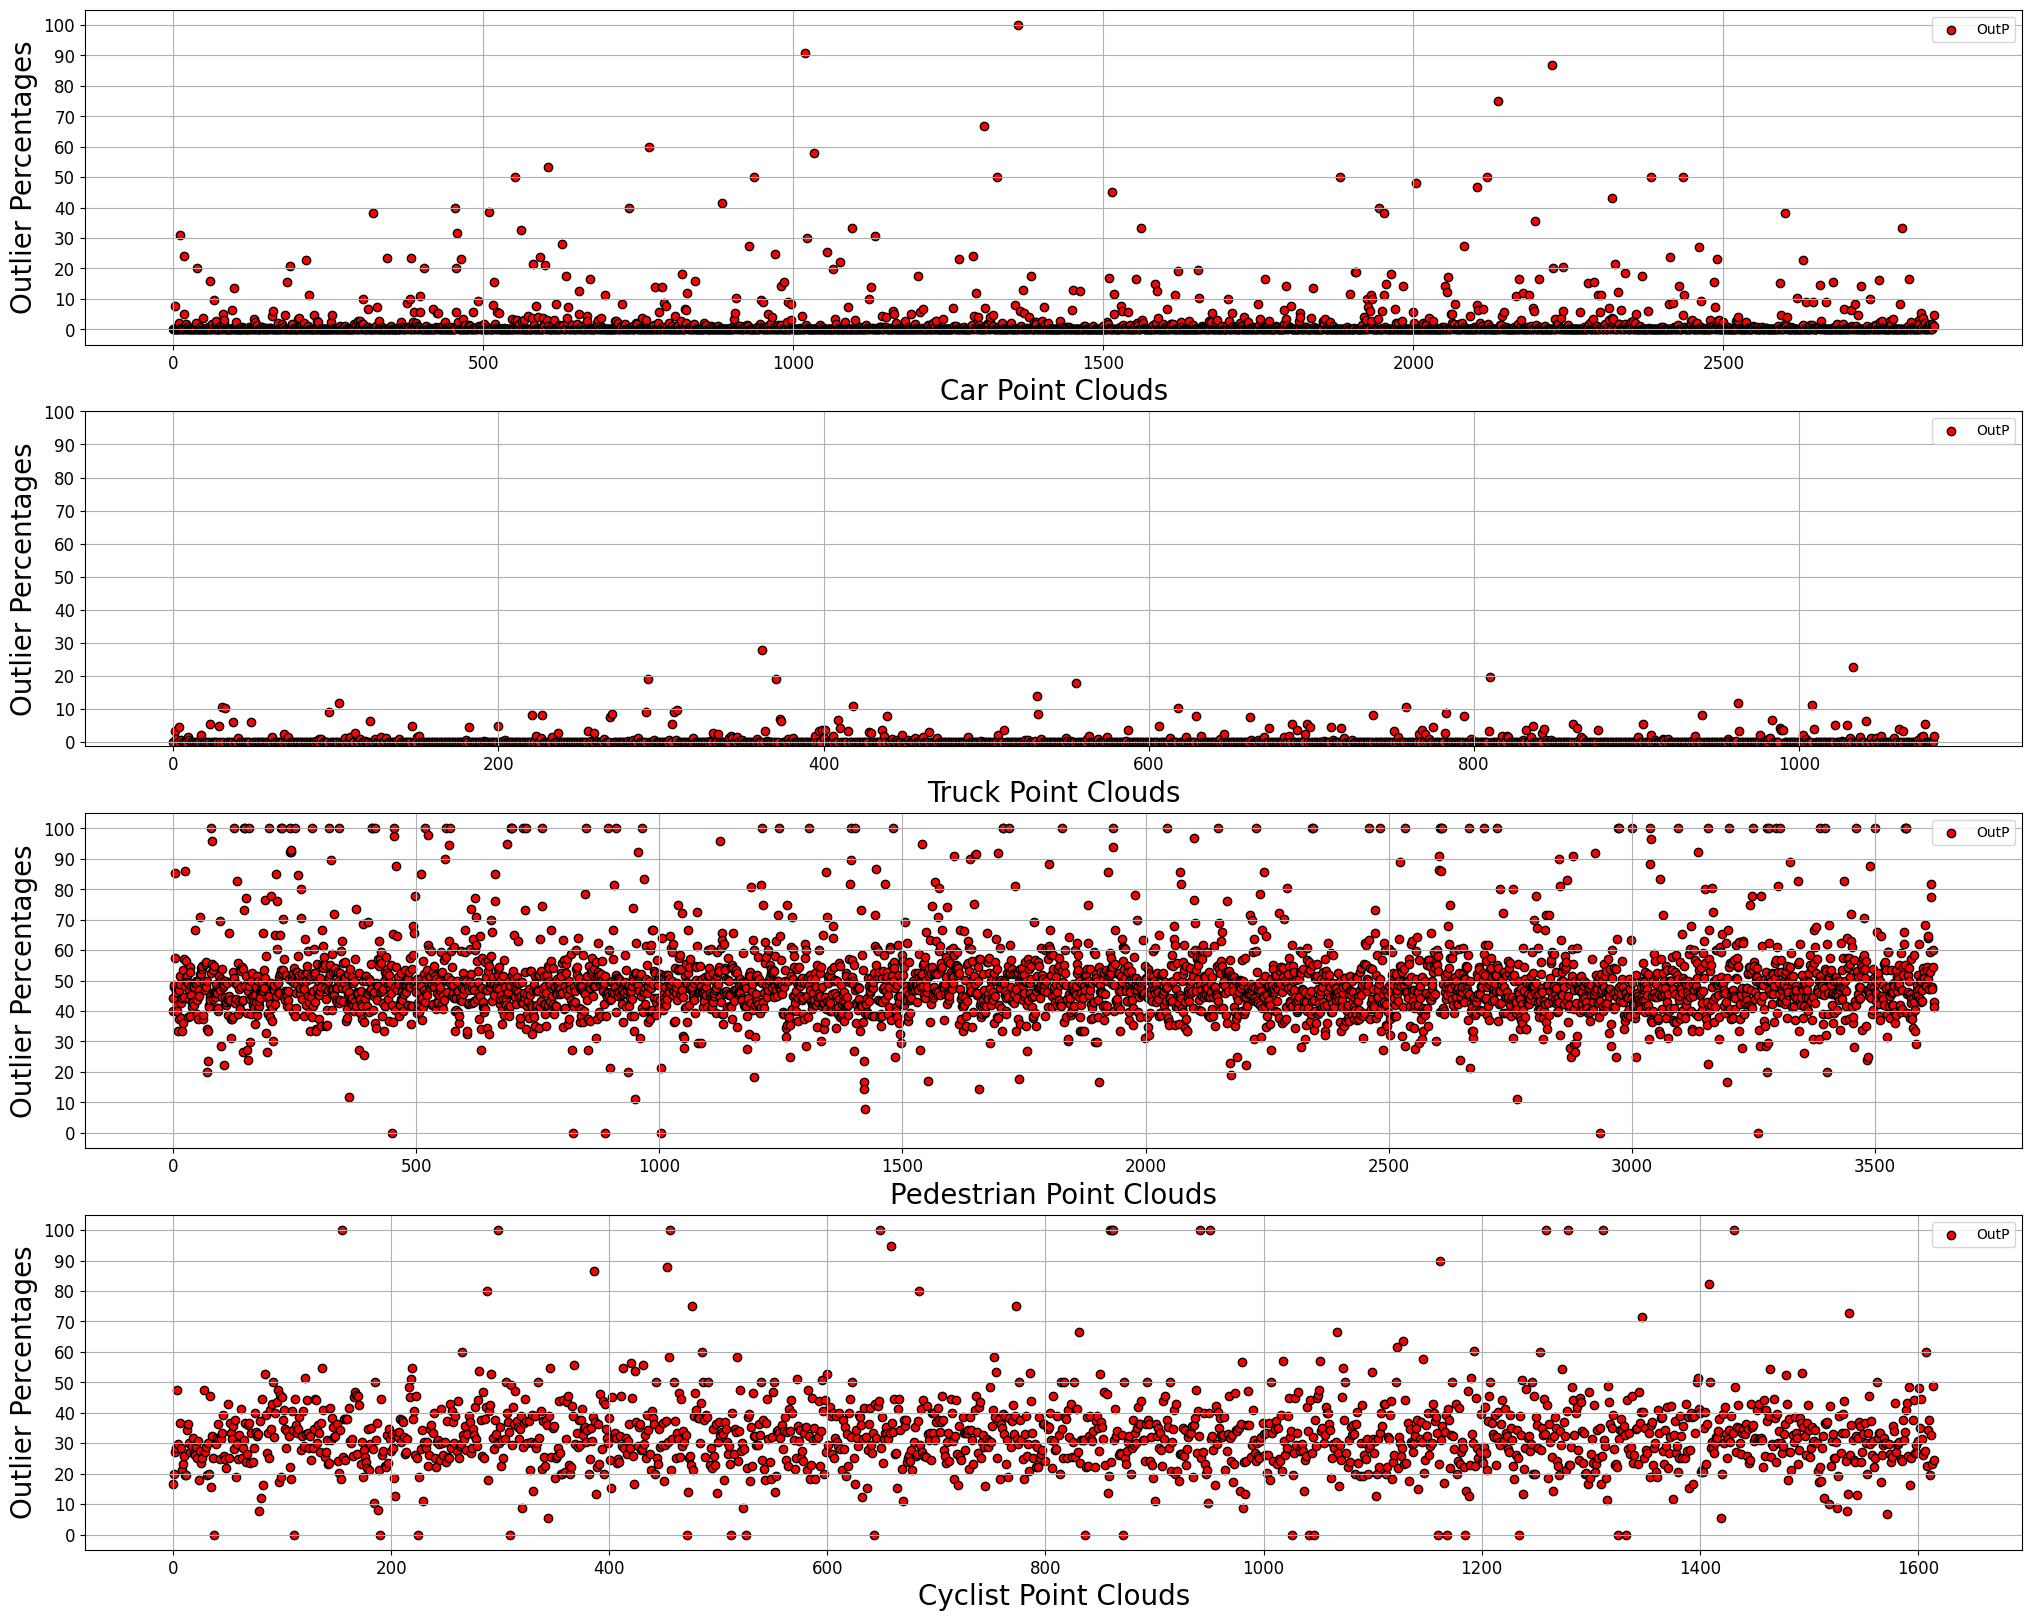

In [19]:
X = np.arange(0, len(cars))

plt.rcParams['figure.figsize'] = [25, 20]

fig, ax = plt.subplots(4)
ax[0].scatter(X, cars, edgecolor='black',color='red', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Car Point Clouds', fontsize=20)

########################

X = np.arange(0, len(truck))
ax[1].scatter(X, truck, edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Truck Point Clouds', fontsize=20)

########################

X = np.arange(0, len(pedestrian))
ax[2].scatter(X, pedestrian, edgecolor='black',color='red', label='OutP')
ax[2].set_yticks(np.arange(0, 110, step=10))
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].legend()
ax[2].grid()
ax[2].set_ylabel('Outlier Percentages', fontsize=20)
ax[2].set_xlabel('Pedestrian Point Clouds', fontsize=20)

########################

X = np.arange(0, len(cyclist))
ax[3].scatter(X, cyclist, edgecolor='black',color='red', label='OutP')
ax[3].set_yticks(np.arange(0, 110, step=10))
ax[3].tick_params(axis='x', labelsize=12)
ax[3].tick_params(axis='y', labelsize=12)
ax[3].legend()
ax[3].grid()
ax[3].set_ylabel('Outlier Percentages', fontsize=20)
ax[3].set_xlabel('Cyclist Point Clouds', fontsize=20)

plt.show()

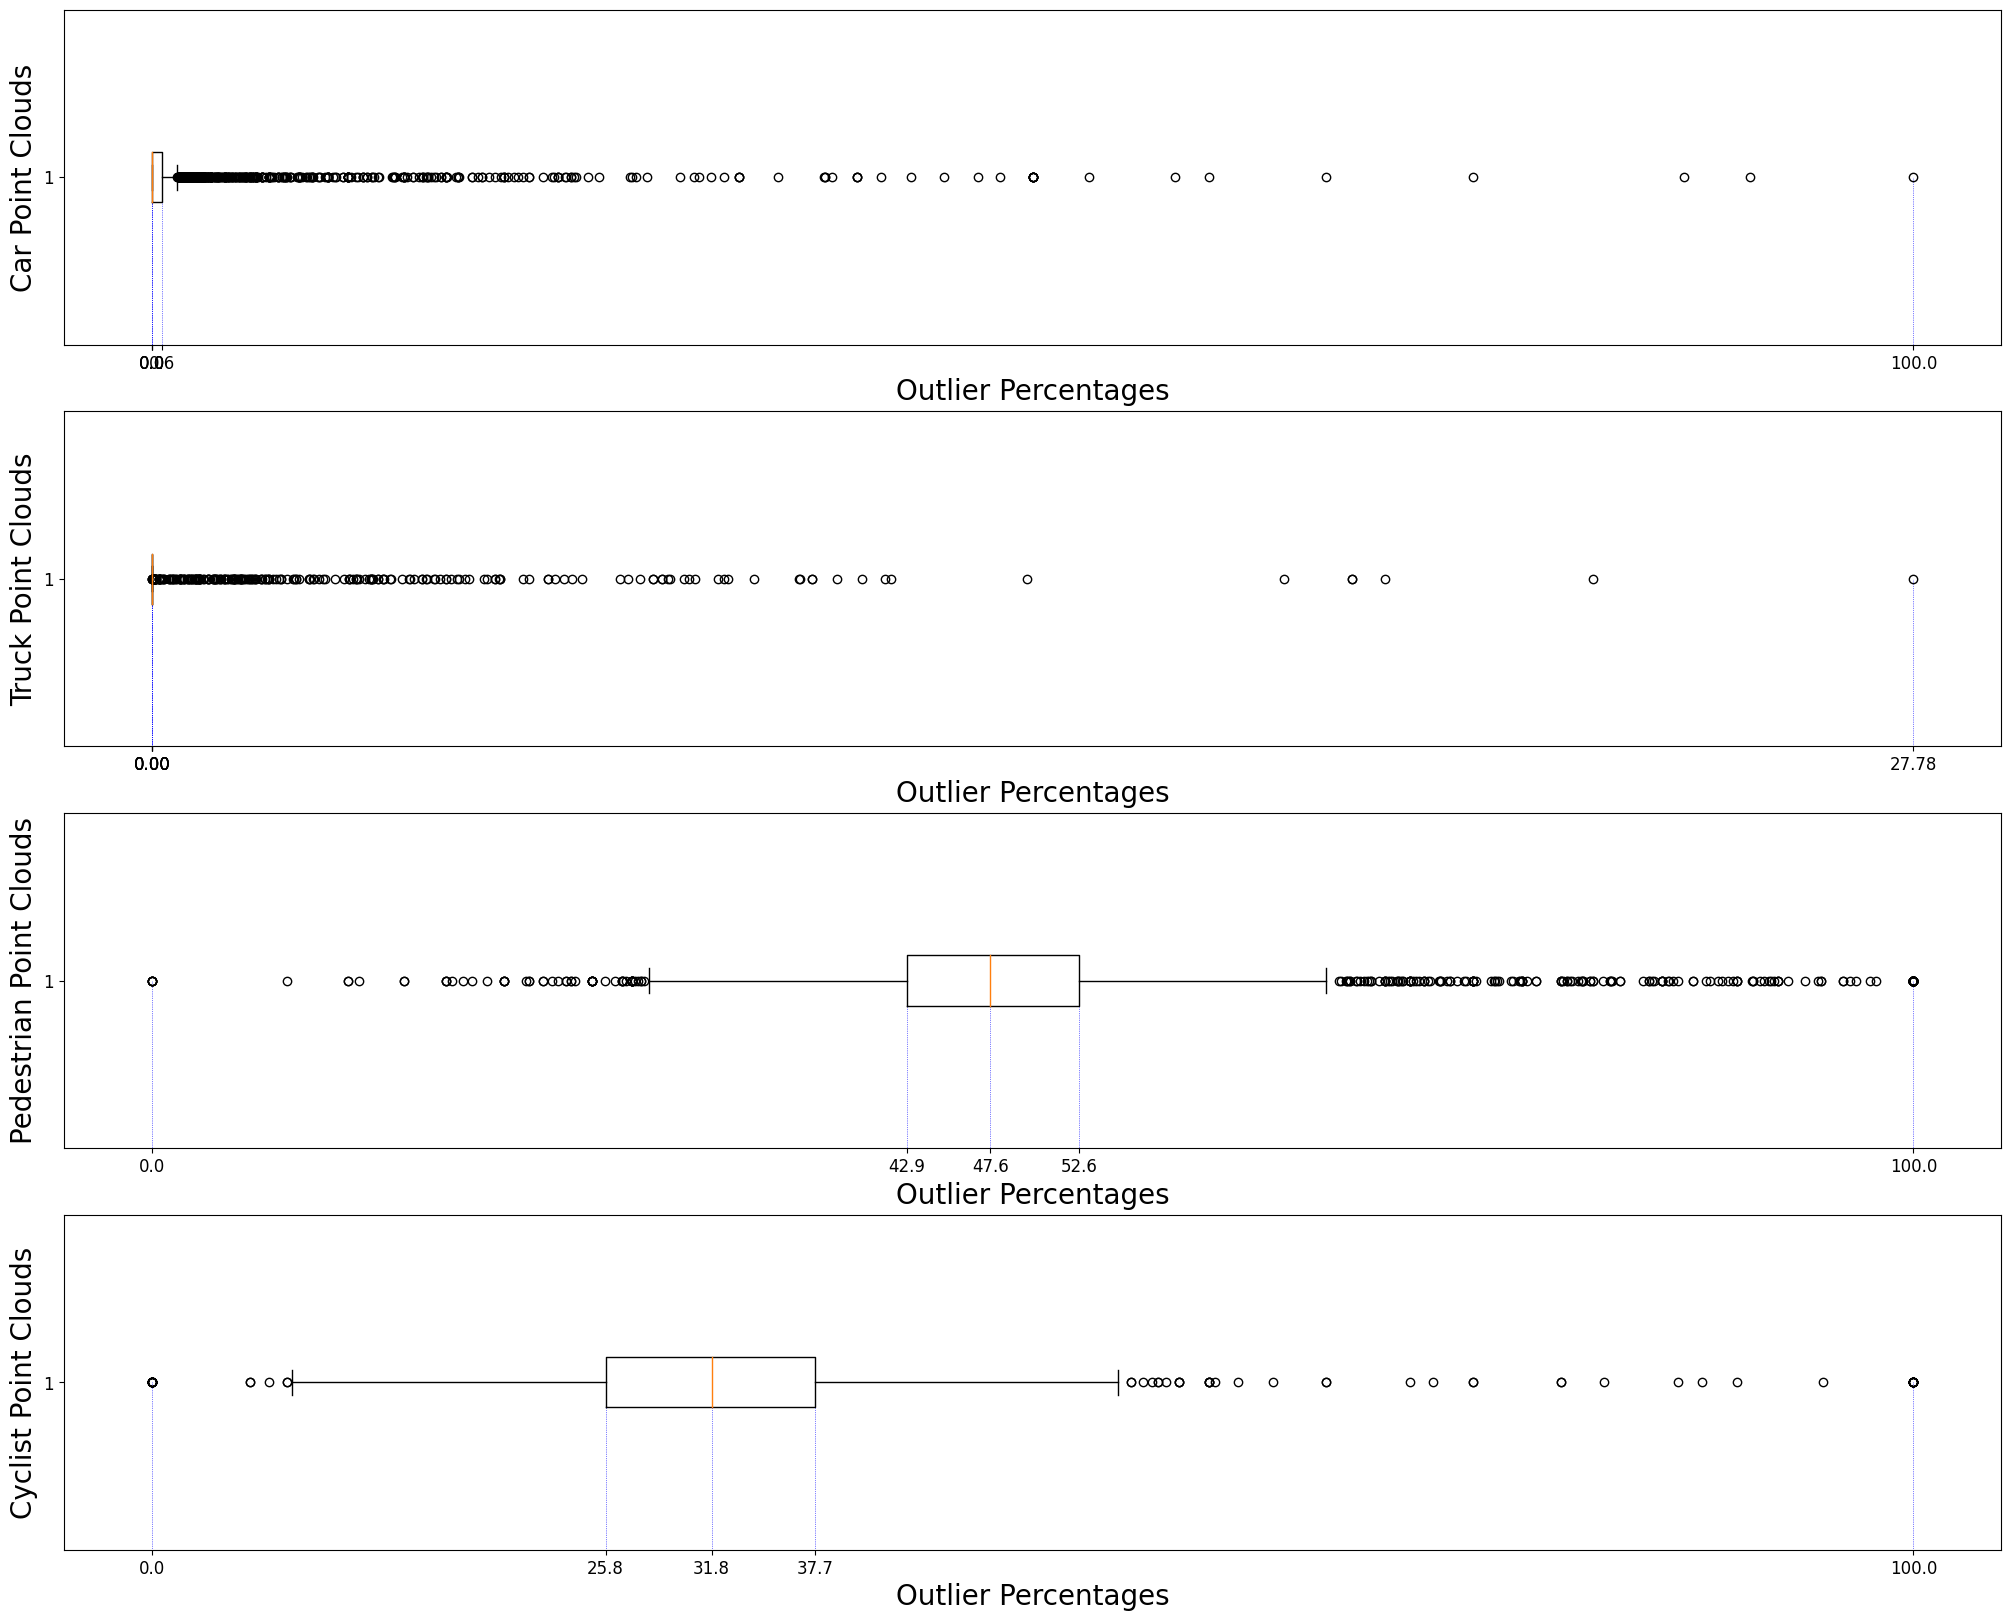

In [20]:
fig, ax = plt.subplots(4, figsize=(25, 20))
##cars
ax[0].boxplot(cars, vert=False, manage_ticks=True)
ax[0].set_xlabel('Outlier Percentages', fontsize=20)
ax[0].set_yticks([1])
ax[0].set_ylabel('Car Point Clouds', fontsize=20)

quantiles = np.percentile(cars, [0, 25, 50, 75, 100])
ax[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[0].set_ylim(0.5, 1.5)
ax[0].set_xticks(quantiles)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

####################

##Trucks
ax[1].boxplot(truck, vert=False, manage_ticks=True)
ax[1].set_xlabel('Outlier Percentages', fontsize=20)
ax[1].set_yticks([1])
ax[1].set_ylabel('Truck Point Clouds', fontsize=20)

quantiles = np.percentile(truck, [0, 25, 50, 75, 100])
ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[1].set_ylim(0.5, 1.5)
ax[1].set_xticks(quantiles)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

####################

##Peds
ax[2].boxplot(pedestrian, vert=False, manage_ticks=True)
ax[2].set_xlabel('Outlier Percentages', fontsize=20)
ax[2].set_yticks([1])
ax[2].set_ylabel('Pedestrian Point Clouds', fontsize=20)

quantiles = np.percentile(pedestrian, [0, 25, 50, 75, 100])
ax[2].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[2].set_ylim(0.5, 1.5)
ax[2].set_xticks(quantiles)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)

####################

##cyclist
ax[3].boxplot(cyclist, vert=False, manage_ticks=True)
ax[3].set_xlabel('Outlier Percentages', fontsize=20)
ax[3].set_yticks([1])
ax[3].set_ylabel('Cyclist Point Clouds', fontsize=20)

quantiles = np.percentile(cyclist, [0, 25, 50, 75, 100])
ax[3].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[3].set_ylim(0.5, 1.5)
ax[3].set_xticks(quantiles)
ax[3].tick_params(axis='x', labelsize=12)
ax[3].tick_params(axis='y', labelsize=12)

plt.show()

In [21]:
print("Cars:")
print("Sample Size:" + str(len(cars)))
print("Quartiles:" + str(np.percentile(cars, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(cars)))
print("Variance:" + str(np.var(cars)))

print("\n")

print("Trucks:")
print("Sample Size:" + str(len(truck)))
print("Quartiles:" + str(np.percentile(truck, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(truck)))
print("Variance:" + str(np.var(truck)))

print("\n")


print("Pedestrians:")
print("Sample Size:" + str(len(pedestrian)))
print("Quartiles:" + str(np.percentile(pedestrian, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(pedestrian)))
print("Variance:" + str(np.var(pedestrian)))

print("\n")

print("Cyclists:")
print("Sample Size:" + str(len(cyclist)))
print("Quartiles:" + str(np.percentile(cyclist, [0, 25, 50, 75, 100])))
print("Standard Deviation:" + str(np.std(cyclist)))
print("Variance:" + str(np.var(cyclist)))

Cars:
Sample Size:2841
Quartiles:[  0.           0.           0.           0.57636888 100.        ]
Standard Deviation:6.5442785125770095
Variance:42.82758125017716


Trucks:
Sample Size:1084
Quartiles:[ 0.          0.          0.          0.         27.77777778]
Standard Deviation:2.3110651026239832
Variance:5.341021908566402


Pedestrians:
Sample Size:3623
Quartiles:[  0.          42.85714286  47.60273973  52.6405758  100.        ]
Standard Deviation:12.539487745033734
Variance:157.2387529078512


Cyclists:
Sample Size:1616
Quartiles:[  0.          25.75757576  31.76846591  37.65087853 100.        ]
Standard Deviation:12.113226076463985
Variance:146.73024597952707


In [ ]:
img = np.asarray(Image.open("C:\Users\nreis\Desktop\Partial Point Cloud Generation\Examples\carmax_bbox_edit.png"))
plt.imshow(img)